# Generating random samples from Yacoub's $\kappa-\mu$ distribution

In [1]:
%matplotlib inline
%config IPython.matplotlib.backend = "retina"
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams["figure.dpi"] = 150
rcParams["savefig.dpi"] = 150

In [2]:
import scipy.special as sps
import numpy as np
import math
from maoud.sampling import rejection_sampling

In [3]:
def kappa_mu_pdf(x, kappa, mu):
        return (2. * mu * (1. + kappa) ** ((mu + 1.) * .5)
                * np.power(x, mu)
                * np.exp(-mu * (1. + kappa) * x * x - mu * kappa
                         + 2. * x * mu * math.sqrt(kappa * (1. + kappa)))
                * sps.ive(mu - 1., 2. * mu * x * math.sqrt(kappa * (1. + kappa)))
                / kappa ** ((mu - 1.) * .5))

Text(0.5,1,'$\\kappa-\\mu$ density')

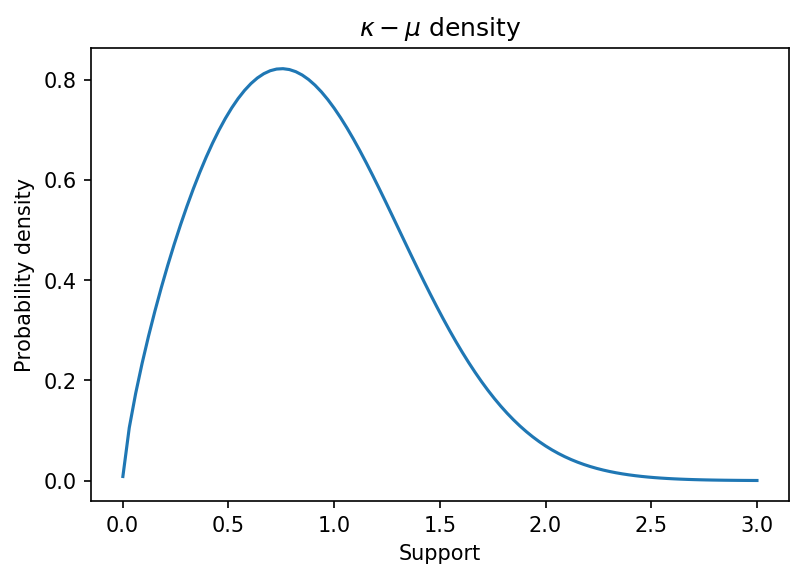

In [4]:
x = np.linspace(1e-3, 3., 100)
kappa, mu = .75, .87
pdf = kappa_mu_pdf(x, kappa, mu)
plt.plot(x, pdf)
plt.ylabel("Probability density")
plt.xlabel("Support")
plt.title(r"$\kappa-\mu$ density")

In [5]:
x = np.linspace(1e-3, 3, 1000)
n_samples = 1e6
kappa, mu = .75, .87
kappa_mu_samples, _ = rejection_sampling(kappa_mu_pdf, x, n_samples, kappa, mu)

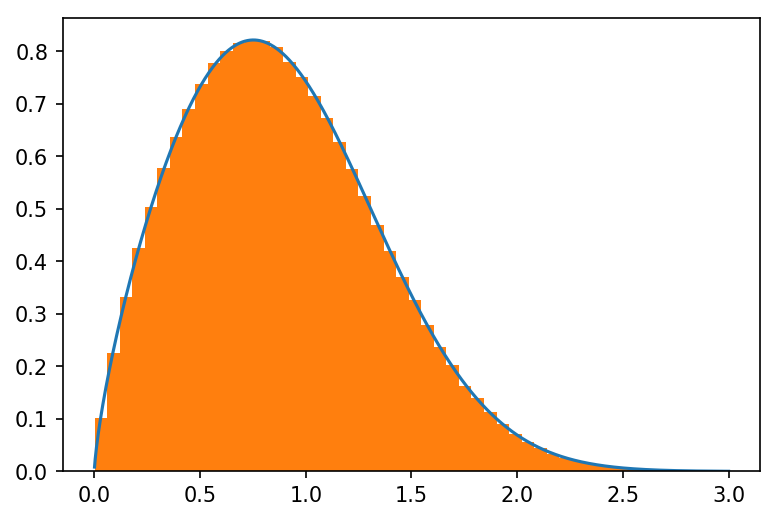

In [6]:
y = kappa_mu_pdf(x, kappa, mu)
plt.plot(x, y)
_ = plt.hist(kappa_mu_samples, bins=50, normed=True)

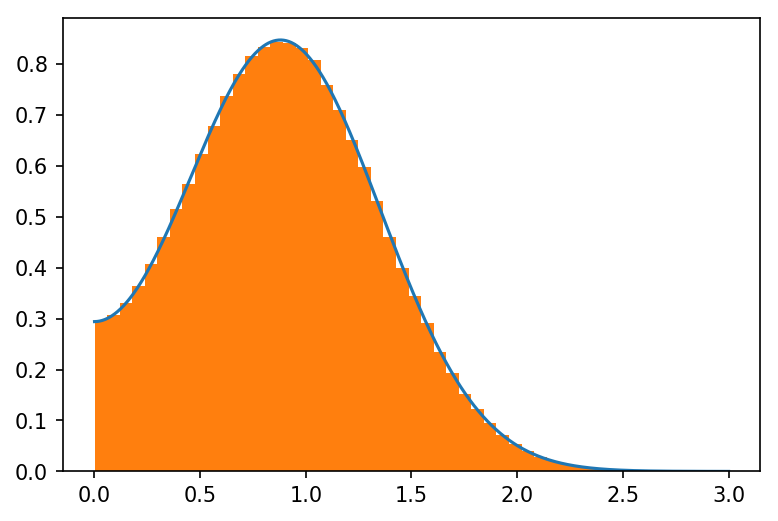

In [7]:
kappa = 3.5
mu = 0.5
kappa_mu_samples, _ = rejection_sampling(kappa_mu_pdf, x, 1e6, kappa, mu)
y = kappa_mu_pdf(x, kappa, mu)
plt.plot(x, y)
_ = plt.hist(kappa_mu_samples, bins=50, normed=True)

In [8]:
kappa = 1.0
mu = 10
kappa_mu_samples, _ = rejection_sampling(kappa_mu_pdf, x, 1e6, kappa, mu)

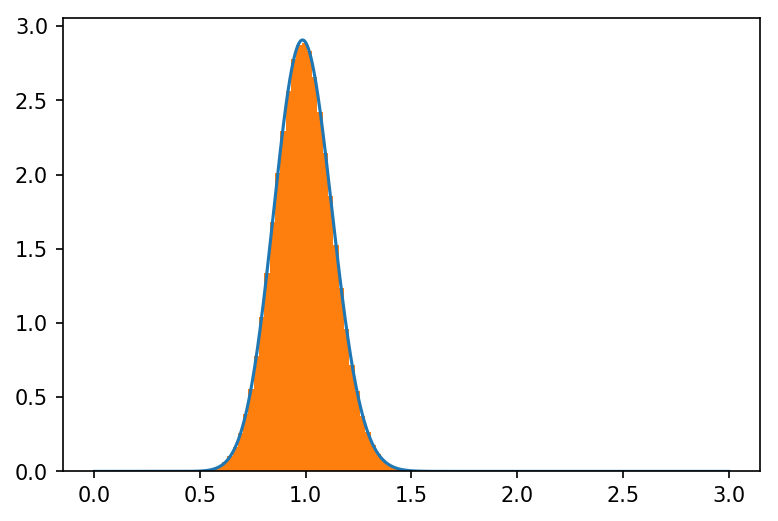

In [9]:
y = kappa_mu_pdf(x, kappa, mu)
plt.plot(x, y)
_ = plt.hist(kappa_mu_samples, bins=50, normed=True)